# Sprawozdanie z Laboratorium 9
## Autorzy: Mateusz Pawliczek, Piotr Świerzy  
## Data: 20.05.2025

---

### Zadanie 1

Celem zadania jest przekształcenie podanych równań różniczkowych wyższych rzędów do układów równań różniczkowych pierwszego rzędu. Tego typu operacja jest istotna zarówno w analizie teoretycznej, jak i w obliczeniach numerycznych — wiele algorytmów (np. metoda Rungego-Kutty) działa jedynie na układach równań pierwszego rzędu.

---

### (a) Równanie Van der Pol’a

Dane jest nieliniowe równanie różniczkowe drugiego rzędu:

```math
y'' = y'(1 - y^2) - y
````

Aby sprowadzić to równanie do postaci układu pierwszego rzędu, wprowadzamy następujące zmienne pomocnicze:

```math
y_1 = y, \quad y_2 = y'
```

Wówczas otrzymujemy układ:

```math
\begin{cases}
y_1' = y_2 \\
y_2' = y_2(1 - y_1^2) - y_1
\end{cases}
```

---

### (b) Równanie Blasiusa

Dane jest nieliniowe równanie trzeciego rzędu:

```math
y''' = -y \cdot y''
```

Wprowadzamy nowe zmienne:

```math
y_1 = y, \quad y_2 = y', \quad y_3 = y''
```

Otrzymujemy układ:

```math
\begin{cases}
y_1' = y_2 \\
y_2' = y_3 \\
y_3' = -y_1 \cdot y_3
\end{cases}
```

Takie podejście pozwala na łatwe rozwiązanie numeryczne tego typu równań, np. przy pomocy `scipy.integrate.solve_ivp`.

---

### (c) II zasada dynamiki Newtona dla problemu dwóch ciał

Rozważamy równania opisujące ruch ciała pod wpływem grawitacji w dwóch wymiarach:

```math
\begin{aligned}
y_1'' &= -\frac{GM \cdot y_1}{(y_1^2 + y_2^2)^{3/2}} \\
y_2'' &= -\frac{GM \cdot y_2}{(y_1^2 + y_2^2)^{3/2}}
\end{aligned}
```

Są to równania drugiego rzędu, które przekształcamy do postaci pierwszego rzędu, wprowadzając zmienne:

```math
y_3 = y_1', \quad y_4 = y_2'
```

Wówczas cały układ przyjmuje postać:

```math
\begin{cases}
y_1' = y_3 \\
y_2' = y_4 \\
y_3' = -\frac{GM \cdot y_1}{(y_1^2 + y_2^2)^{3/2}} \\
y_4' = -\frac{GM \cdot y_2}{(y_1^2 + y_2^2)^{3/2}}
\end{cases}
```

Taki układ opisuje pełną dynamikę ruchu punktu materialnego w centralnym polu grawitacyjnym i może być bezpośrednio użyty do analizy orbitalnej.

---

### Zadanie 2

Przekształcamy dany problem początkowy do postaci autonomicznej (tzn. bez jawnej zależności od zmiennej $t$ w prawej stronie równań).

Dany układ:

```math
\begin{aligned}
y_1' &= \frac{y_1}{t} + y_2 t \\
y_2' &= \frac{t(y_2^2 - 1)}{y_1} \\
y_1(1) &= 1 \\
y_2(1) &= 0
\end{aligned}
````

---

### Przekształcenie do postaci autonomicznej

Wprowadzamy nową zmienną:

```math
y_3 = t
```

i dodajemy nowe równanie opisujące jej ewolucję:

```math
y_3' = 1
```

Podstawiamy $t = y_3$ do pozostałych równań:

```math
\begin{aligned}
y_1' &= \frac{y_1}{y_3} + y_2 y_3 \\
y_2' &= \frac{y_3 (y_2^2 - 1)}{y_1} \\
y_3' &= 1
\end{aligned}
```

---

### Warunki początkowe

Z oryginalnych warunków:

```math
y_1(1) = 1, \quad y_2(1) = 0
```

Wynika:

```math
y_3(1) = 1
```

Zatem ostateczny autonomiczny problem początkowy ma postać:

```math
\begin{cases}
y_1' = \dfrac{y_1}{y_3} + y_2 y_3 \\
y_2' = \dfrac{y_3 (y_2^2 - 1)}{y_1} \\
y_3' = 1 \\
y_1(1) = 1, \quad y_2(1) = 0, \quad y_3(1) = 1
\end{cases}
```

### Podsumowanie

Dzięki wprowadzeniu zmiennej $y_3 = t$, udało się sprowadzić nieautonomiczny układ do postaci autonomicznej, co umożliwia jego późniejszą analizę numeryczną lub teoretyczną z użyciem metod dla autonomicznych układów ODE.


---

### Zadanie 3

Rozważmy problem początkowy:

```math
\begin{cases}
y' = \sqrt{1 - y} \\
y(0) = 0
\end{cases}
````

Zbadamy, czy funkcja:

```math
y(t) = \dfrac{t(4 - t)}{4}
```

jest rozwiązaniem tego problemu oraz wyznaczymy dziedzinę, na której to rozwiązanie jest poprawne.

---

### 1. Sprawdzenie warunku początkowego

Podstawiamy $t = 0$:

```math
y(0) = \frac{0 \cdot (4 - 0)}{4} = 0
```

Zatem funkcja spełnia warunek początkowy.

---

### 2. Obliczenie pochodnej $y'(t)$

Rozwijamy wzór:

```math
y(t) = \frac{4t - t^2}{4}
```

Liczymy pochodną:

```math
y'(t) = \frac{4 - 2t}{4}
```

---

### 3. Sprawdzenie równania różniczkowego

Równanie:

```math
y'(t) = \sqrt{1 - y(t)}
```

Lewa strona:

```math
y'(t) = \frac{4 - 2t}{4}
```

Prawa strona:

```math
\sqrt{1 - y(t)} = \sqrt{1 - \frac{t(4 - t)}{4}} = \sqrt{\frac{4 - t(4 - t)}{4}}
```

Rozwijamy licznik:

```math
t(4 - t) = 4t - t^2 \Rightarrow 4 - (4t - t^2) = 4 - 4t + t^2
```

Zatem:

```math
\sqrt{1 - y(t)} = \sqrt{ \frac{t^2 - 4t + 4}{4} } = \sqrt{ \frac{(t - 2)^2}{4} } = \frac{|t - 2|}{2}
```

Porównujemy obie strony:

```math
y'(t) = \frac{4 - 2t}{4} = \frac{2 - t}{2}
```

Zatem:

```math
y'(t) = \frac{2 - t}{2}, \quad \sqrt{1 - y(t)} = \frac{|t - 2|}{2}
```

Aby równanie było spełnione:

```math
\frac{2 - t}{2} = \frac{|t - 2|}{2}
```

To prawda tylko wtedy, gdy:

```math
2 - t = |t - 2| \Rightarrow t \leq 2
```

Bo:

* dla $t < 2$, $|t - 2| = 2 - t$ → zgadza się,
* dla $t > 2$, $|t - 2| = t - 2$, więc równanie nie jest spełnione.

---

### 4. Dziedzina rozwiązania

Funkcja spełnia równanie różniczkowe tylko wtedy, gdy:

```math
t \leq 2
```

Dodatkowo musimy uwzględnić dziedzinę pierwiastka:

```math
\sqrt{1 - y(t)} \Rightarrow 1 - y(t) \geq 0
```

Zatem:

```math
y(t) \leq 1
```

Sprawdzamy, dla jakich $t$ zachodzi $y(t) \leq 1$:

```math
y(t) = \frac{t(4 - t)}{4} \leq 1
```

Pomnóżmy obie strony przez 4:

```math
t(4 - t) \leq 4 \Rightarrow 4t - t^2 \leq 4
\Rightarrow -t^2 + 4t - 4 \leq 0 \newline
t^2 - 4t + 4 \geq 0 \newline
(t - 2)^2 \geq 0
```

Zatem nierówność spełniona jest dla:

```math
t \in \real
```

---

### Podsumowanie

Funkcja:

```math
y(t) = \frac{t(4 - t)}{4}
```

spełnia równanie różniczkowe $y' = \sqrt{1 - y}$ oraz warunek początkowy $y(0) = 0$.
Dziedziną, dla której stanowi rozwiązanie problemu początkowego, jest:

```math
t \in (-\infty, 2]
```


---

### Zadanie 4

Rozważamy równanie różniczkowe:

```math
y' = -5y, \quad y(0) = 1
````

Zbadamy jego stabilność oraz zastosujemy metody numeryczne (jawna i niejawna metoda Eulera) do wyznaczenia rozwiązania przy różnych krokach.

---

### (a) Analityczna stabilność

Równanie ma rozwiązanie analityczne:

```math
y(t) = e^{-5t}
````

Rozwiązanie zbiega do 0 przy $t \to \infty$, więc układ jest **stabilny analitycznie** – ma charakter tłumiony.

---

### (b) Zbieżność metody Eulera – porównanie numeryczne i analityczne

Sprawdzimy zbieżność metody Eulera dla różnych wartości kroku $h$, porównując wynik numeryczny z dokładnym rozwiązaniem.


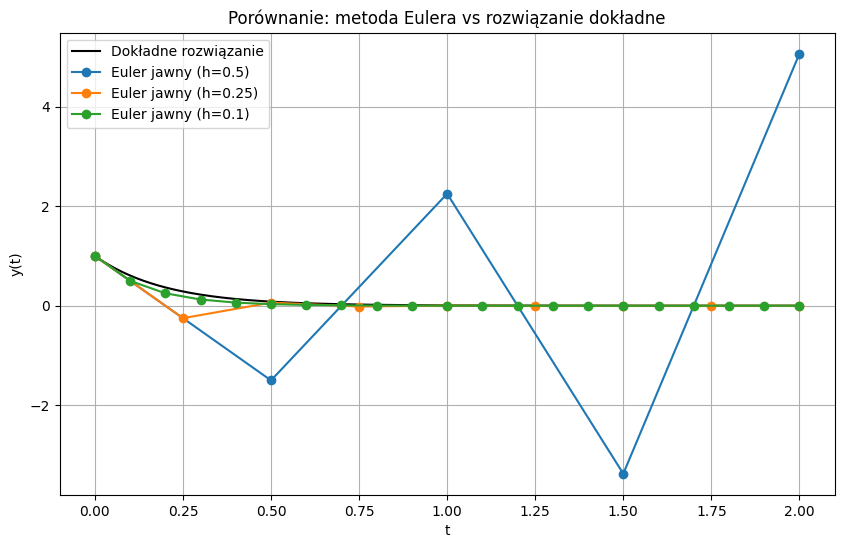

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dokładne rozwiązanie
def y_exact(t):
    return np.exp(-5 * t)

# Metoda Eulera (jawna)
def euler_explicit(f, y0, h, t_end):
    t_values = np.arange(0, t_end + h, h)
    y_values = np.zeros_like(t_values)
    y_values[0] = y0
    for i in range(1, len(t_values)):
        y_values[i] = y_values[i-1] + h * f(t_values[i-1], y_values[i-1])
    return t_values, y_values

# Prawa strona równania
f = lambda t, y: -5 * y

# Porównanie dla różnych kroków
h_vals = [0.5, 0.25, 0.1]
t_max = 2.0
t_plot = np.linspace(0, t_max, 200)

plt.figure(figsize=(10,6))
plt.plot(t_plot, y_exact(t_plot), label="Dokładne rozwiązanie", color="black")

for h in h_vals:
    t_num, y_num = euler_explicit(f, y0=1, h=h, t_end=t_max)
    plt.plot(t_num, y_num, 'o-', label=f"Euler jawny (h={h})")

plt.title("Porównanie: metoda Eulera vs rozwiązanie dokładne")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.show()

Jak widać, dla mniejszych kroków $h$ metoda Eulera zbliża się do rozwiązania dokładnego, co potwierdza jej **zbieżność**.

---

### (c) Stabilność numeryczna metody Eulera dla `h = 0.5`

Sprawdzamy, czy metoda Eulera jawna jest stabilna przy kroku $h = 0.5$. Dla równania $y' = \lambda y$, stabilność jawnej metody wymaga:

```math
|1 + h \lambda| < 1
````

Podstawiając $\lambda = -5$, mamy:

```math
|1 - 5 \cdot 0.5| = 1.5 > 1
```

Metoda **nie jest stabilna** dla tego kroku.

---

### (d) Rozwiązanie jawne Eulera w punkcie `t = 0.5`

Obliczamy przybliżone rozwiązanie numeryczne w punkcie $t = 0.5$ metodą Eulera jawną.

In [2]:
# h = 0.5, jeden krok
t_d, y_d = euler_explicit(f, y0=1, h=0.5, t_end=0.5)
print(f"Wynik jawny dla t = 0.5: y = {y_d[-1]:.4f}")

Wynik jawny dla t = 0.5: y = -1.5000


---

### (e) Stabilność metody Eulera niejawnej

Stosując metodę Eulera niejawną:

```math
y_{n+1} = y_n + h f(t_{n+1}, y_{n+1})
````

dla $y' = -5y$ mamy:

```math
y_{n+1} = \frac{y_n}{1 + 5h}
```

Ta metoda **jest stabilna dla dowolnego kroku $h > 0$**.

---

### (f) Euler niejawny – wartość w `t = 0.5`

Obliczamy wynik numeryczny w punkcie $t = 0.5$ metodą niejawną.

In [3]:
def euler_implicit(y0, h, t_end):
    t_values = np.arange(0, t_end + h, h)
    y_values = np.zeros_like(t_values)
    y_values[0] = y0
    for i in range(1, len(t_values)):
        y_values[i] = y_values[i-1] / (1 + 5 * h)
    return t_values, y_values

t_i, y_i = euler_implicit(y0=1, h=0.5, t_end=0.5)
print(f"Wynik niejawny dla t = 0.5: y = {y_i[-1]:.4f}")

Wynik niejawny dla t = 0.5: y = 0.2857


---

### (g) Maksymalny krok `h` dla błędu $< 0.001$ w `t = 0.5`

Chcemy, by błąd jawnej metody nie przekraczał $0.001$:

```math
|y_n - y(0.5)| < 0.001
````

Obliczamy to w Pythonie:

In [ ]:
y_true = y_exact(0.5)
tol = 0.001

h = 0.01
while h <= 1.0:
    _, y_num = euler_explicit(f, y0=1, h=h, t_end=0.5)
    error = abs(y_num[-1] - y_true)
    if error >= tol:
        break
    h += 0.001

h_max = h - 0.001
n_steps = int(np.ceil(0.5 / h_max))

print(f"Maksymalny dopuszczalny krok h: {h_max:.3f}")
print(f"Liczba kroków: {n_steps}")

Maksymalny dopuszczalny krok h: 0.009
Liczba kroków: 56




---

### (h) Iteracja bezpośrednia – warunek zbieżności

Dla iteracji:

```math
y_{n+1}^{(k+1)} = y_n - 5h y_{n+1}^{(k)}
```

funkcja iteracyjna to $\varphi(y) = y_n - 5h y$, której pochodna to $\varphi'(y) = -5h$. Dla zbieżności iteracji wymagamy:

```math
|\varphi'(y)| = 5h < 1 \Rightarrow h < 0.2
```

Zatem metoda iteracyjna działa poprawnie dla $h < 0.2$.

---

---

### Zadanie 5

Rozważamy układ równań:

```math
\begin{cases}
y_1' = -2 y_1 + y_2, \\
y_2' = - y_1 - 2 y_2.
\end{cases}
```

Stosując metodę Eulera jawną do tego układu, iterujemy według:

$$
\mathbf{y}_{n+1} = (I + hA) \mathbf{y}_n,
$$

gdzie macierz $A$ opisuje układ:

$$
A = \begin{bmatrix} -2 & 1 \\ -1 & -2 \end{bmatrix}.
$$

Stabilność numeryczna metody Eulera wymaga, by wszystkie wartości własne macierzy iteracyjnej $M = I + hA$ miały moduł mniejszy lub równy 1.

---

### Kod w Python i wyjaśnienie


In [5]:
import numpy as np

# Macierz A opisująca układ
A = np.array([[-2, 1],
              [-1, -2]])

# Funkcja oblicza maksymalny moduł wartości własnych macierzy M = I + hA
def max_eigenvalue_mod(h):
    M = np.eye(2) + h * A
    eigvals = np.linalg.eigvals(M)
    return np.max(np.abs(eigvals))

# Przeszukujemy wartości kroku h od 0 do 1, aby znaleźć maksymalny stabilny krok
h_values = np.linspace(0, 1, 1000)
stable_h = [h for h in h_values if max_eigenvalue_mod(h) <= 1]

print(f"Maksymalny stabilny krok h = {max(stable_h):.3f}")


Maksymalny stabilny krok h = 0.800


---

**Co robi ten kod?**

* Definiuje macierz $A$ opisującą układ równań.
* Dla każdej wartości kroku $h$ z zakresu \[0, 1] tworzy macierz iteracyjną $M = I + hA$.
* Oblicza wartości własne $M$ i wybiera ich maksymalny moduł.
* Sprawdza, dla których $h$ maksymalny moduł wartości własnych nie przekracza 1.
* Wyświetla największy krok $h$ spełniający warunek stabilności.

---

### Wniosek

Z analizy i symulacji wynika, że metoda Eulera jawna dla tego układu jest stabilna dla kroków $h \leq 0{,}8$.

---


### Zadanie 6

Rozpatrujemy równanie różniczkowe:

```math
y' = \alpha t^{\alpha - 1}, \quad y(0) = 0,
````

którego dokładnym rozwiązaniem jest

```math
y(t) = t^{\alpha}.
```

### Przebieg obliczeń i ich interpretacja

W zadaniu numerycznie rozwiązaliśmy to równanie metodą Eulera dla trzech wartości parametru $\alpha$: 2.5, 1.5 oraz 1.1. Dla każdej z nich zastosowaliśmy trzy różne kroki czasowe $h = 0.2, 0.1, 0.05$.

Implementacja polega na dyskretnym podejściu do rozwiązania równania, gdzie w kolejnych punktach czasowych wyliczamy przybliżoną wartość funkcji $y$ na podstawie wartości pochodnej w poprzednim punkcie. Oznacza to, że posuwamy się krok po kroku, korzystając z równania różnicowego, aby oszacować kolejne wartości.

Następnie, dla każdego kroku i każdej wartości $\alpha$, porównujemy wartość otrzymaną metodą numeryczną z wartością dokładną $t^\alpha$ w punkcie $t=1$. Pozwala to ocenić błąd metody, który jest miarą jej dokładności.

Aby określić, jak szybko metoda staje się dokładniejsza przy zmniejszaniu kroku, obliczamy empiryczny rząd zbieżności. Jest to liczba opisująca, jak bardzo błąd zmniejsza się wraz ze zmniejszeniem kroku $h$. Teoretycznie metoda Eulera jest pierwszego rzędu, więc oczekujemy, że błąd będzie proporcjonalny do $h$.

### Kod numeryczny


In [6]:
import numpy as np

def euler_method(alpha, h):
    t = np.arange(0, 1 + h, h)
    y = np.zeros_like(t)
    for i in range(len(t) - 1):
        f = alpha * t[i]**(alpha - 1)
        y[i+1] = y[i] + h * f
    return t, y

def exact_solution(alpha, t):
    return t**alpha

def compute_error(y_num, y_exact):
    return np.abs(y_num - y_exact)

def empirical_order(error1, error2, h1, h2):
    return np.log(error1 / error2) / np.log(h1 / h2)

alphas = [2.5, 1.5, 1.1]
hs = [0.2, 0.1, 0.05]

for alpha in alphas:
    errors = []
    print(f"\nAlpha = {alpha}")
    for h in hs:
        t, y_num = euler_method(alpha, h)
        y_ex = exact_solution(alpha, t)
        error = compute_error(y_num, y_ex)[-1]
        errors.append(error)
        print(f"h = {h:.2f}, Błąd = {error:.5e}")

    for i in range(len(hs) - 1):
        p = empirical_order(errors[i], errors[i+1], hs[i], hs[i+1])
        print(f"Empiryczny rząd zbieżności między h={hs[i]:.2f} a h={hs[i+1]:.2f}: p ≈ {p:.3f}")
    


Alpha = 2.5
h = 0.20, Błąd = 2.38638e-01
h = 0.10, Błąd = 1.22076e-01
h = 0.05, Błąd = 6.17544e-02
Empiryczny rząd zbieżności między h=0.20 a h=0.10: p ≈ 0.967
Empiryczny rząd zbieżności między h=0.10 a h=0.05: p ≈ 0.983

Alpha = 1.5
h = 0.20, Błąd = 1.75392e-01
h = 0.10, Błąd = 8.42360e-02
h = 0.05, Błąd = 4.08301e-02
Empiryczny rząd zbieżności między h=0.20 a h=0.10: p ≈ 1.058
Empiryczny rząd zbieżności między h=0.10 a h=0.05: p ≈ 1.045

Alpha = 1.1
h = 0.20, Błąd = 1.87778e-01
h = 0.10, Błąd = 9.13641e-02
h = 0.05, Błąd = 4.44843e-02
Empiryczny rząd zbieżności między h=0.20 a h=0.10: p ≈ 1.039
Empiryczny rząd zbieżności między h=0.10 a h=0.05: p ≈ 1.038


### Wnioski z przeprowadzonych obliczeń

Zmniejszanie kroku numerycznego prowadzi do systematycznego spadku błędu, co potwierdza poprawność implementacji oraz typowe własności metody Eulera. Obserwowany empiryczny rząd zbieżności wynosi około 1 dla wszystkich analizowanych wartości $\alpha$, co jest zgodne z teoretycznym rzędem zbieżności metody Eulera.

Nie zaobserwowano istotnego spadku rzędu zbieżności przy mniejszych wartościach $\alpha$; wręcz przeciwnie, dla $\alpha = 1.1$ i $\alpha = 1.5$ wartości rzędu zbieżności nieznacznie przekraczają 1. Może to wynikać z lokalnych własności rozwiązania lub charakterystyki błędu globalnego, jednak nie wskazuje to na pogorszenie jakości metody.

Podsumowując, metoda Eulera wykazuje oczekiwany pierwszy rząd zbieżności i jest efektywna do numerycznego rozwiązywania tego typu problemów, niezależnie od wartości $\alpha$ w analizowanym zakresie.
